<a href="https://colab.research.google.com/github/AhmedXAlDeeb/NTI_AI_IOT/blob/main/Day3_MPG_Ahmed_Mohamed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [ ]:
url ='http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', 'Origin']
model=linear_model.LinearRegression()



*   data arenot comma seperated
*   data is unlabeled
*   Null Values are not empty
*   Last Column need to be drpped






In [ ]:
df = pd.read_csv(url, sep=' ', names=column_names, na_values='?', comment='\t', skipinitialspace=True )
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
mms =MinMaxScaler()
mms.fit(df)
df = mms.transform(df)
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0
...,...,...,...,...,...,...,...,...
393,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0
394,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.5
395,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0
396,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0


In [ ]:
y = df.iloc[:,0]
x = df.iloc[:,4]
x=np.array(x).reshape(-1,1)
x.shape

(398, 1)

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(x,y,test_size=0.25)
X_train.shape

(298, 1)

In [ ]:
#pd.DataFrame(np.corrcoef(df))
df.corr()

,0,1,2,3,4,5,6,7
0,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
1,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
2,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
3,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
4,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
5,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
6,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
7,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


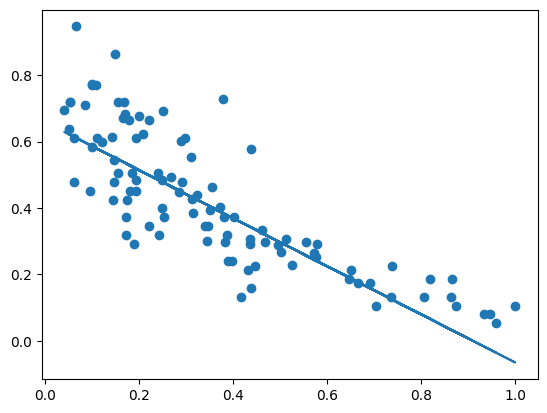

In [ ]:
model.fit(X_train,Y_train)
Y_hat=model.predict(X_test)
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_hat)